# Instance Based Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "file:///C:/Users/ADMIN/Downloads/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
dataset = pd.read_csv(path, names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[14  0  0]
 [ 0 22  2]
 [ 0  2 20]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      0.92      0.92        24
 Iris-virginica       0.91      0.91      0.91        22

       accuracy                           0.93        60
      macro avg       0.94      0.94      0.94        60
   weighted avg       0.93      0.93      0.93        60

Accuracy: 0.9333333333333333


In [11]:
import numpy as np
import pandas as pd

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

data = pd.read_csv(path, names=headernames)
array = data.values
X = array[:, :2]
Y = array[:, 2]
data.shape  
Output: (150, 5)

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X, Y)

print("The MSE is:", format(np.power(Y- knnr.predict(X),2).mean()))

The MSE is: 0.1706753333333333


# Support Vector Machine

Text(0.5, 1.0, 'Support Vector Classifier with\xa0linear\xa0kernel')

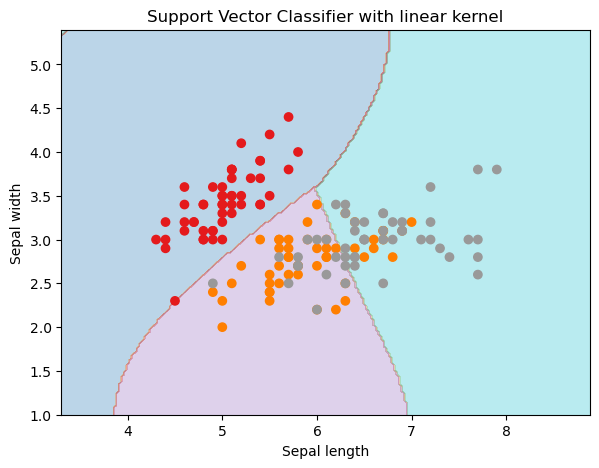

In [12]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

C = 1.0

svc_classifier = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

Text(0.5, 1.0, 'Support Vector Classifier with rbf kernel')

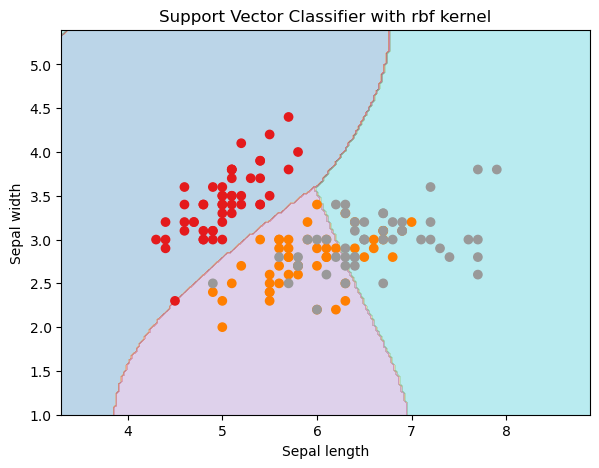

In [13]:
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap = plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')

In [14]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


# Hidden Markov Model

In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from tqdm import tqdm 
from matplotlib import pyplot as plt 
 
from sklearn.model_selection import GroupShuffleSplit 
from hmmlearn import hmm 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
 

In [23]:
dataset = pd.read_csv("C:\\Users\\ADMIN\\Documents\\ner_dataset.csv", encoding='latin1') 
datasetdataset = dataset.fillna(method="ffill") 
datasetdataset = dataset.rename(columns={'Sentence #': 'sentence'}) 
dataset.head(5)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [24]:
tags = list(set(dataset.POS.values)) 
words = list(set(dataset.Word.values)) 
len(tags), len(words)

(42, 35178)

In [28]:
dataset = pd.read_csv(r"C:\Users\ADMIN\Documents\ner_dataset.csv", encoding='latin1')
dataset = dataset.fillna(method="ffill")
dataset = dataset.rename(columns={'Sentence #': 'sentence'})

# Reset index to ensure the 'sentence' column is preserved
dataset = dataset.reset_index(drop=True)

y = dataset.POS
X = dataset.drop(['POS', 'sentence'], axis=1)

groupshufflesplit = GroupShuffleSplit(n_splits=2, test_size=.33, random_state=42) 
ix_train, ix_test = next(groupshufflesplit.split(X, y, groups=dataset['sentence'])) 

datasetdataset_train = dataset.loc[ix_train] 
datasetdataset_test = dataset.loc[ix_test] 
datasetdataset_train

,sentence,Word,POS,Tag
24,Sentence: 2,Families,NNS,O
25,Sentence: 2,of,IN,O
26,Sentence: 2,soldiers,NNS,O
27,Sentence: 2,killed,VBN,O
28,Sentence: 2,in,IN,O
...,...,...,...,...
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O


In [29]:
tags = list(set(datasetdataset_train.POS.values)) 
words = list(set(datasetdataset_train.Word.values)) 
len(tags), len(words) 

(42, 29586)

In [33]:
dataframe_update = datasetdataset_train.sample(frac=.15, replace=False, random_state=42) 
dataframe_update.Word = 'UNKNOWN' 
datasetdataset_train.update(dataframe_update) 
words = list(set(datasetdataset_train.Word.values)) 
# Convert words and tags into numbers 
word2id = {w: i for i, w in enumerate(words)} 
tag2id = {t: i for i, t in enumerate(tags)} 
id2tag = {i: t for i, t in enumerate(tags)} 
len(tags), len(words) 

(42, 27553)

In [38]:
num_tags = len(tag2id)
tags_to_next_tags_count = np.zeros((num_tags, num_tags), dtype=int)
sentences = list(datasetdataset_train.sentence)
pos = list(datasetdataset_train.POS)

for i in range(len(sentences)):
    if i > 0 and sentences[i] == sentences[i - 1]:
        prevtagid = tag2id[pos[i - 1]]
        nexttagid = tag2id[pos[i]]
        tags_to_next_tags_count[prevtagid][nexttagid] += 1

In [40]:
model = hmm.MultinomialHMM(n_components=len(tags), algorithm='viterbi', random_state=42)
model.startprob_ = my_start_prob
model.transmat_ = my_transmat
model.emissionprob_ = my_emission_prob

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


NameError: name 'my_start_prob' is not defined

In [44]:
datasetdataset_test.loc[~datasetdataset_test['Word'].isin(words), 'Word'] = 'UNKNOWN'
test_word = list(datasetdataset_test.Word)
samples_of = []
for i, val in enumerate(test_word):
    samples_of.append([word2id[val]])

lengths = []
count = 0
sentences = list(datasetdataset_test.sentence)
for i in range(len(sentences)):
    if i > 0 and sentences[i] == sentences[i - 1]:
        count += 1
    elif i > 0:
        lengths.append(count)
        count = 1
    else:
        count = 1

predict_pos = model.predict(samples_of, lengths)
predict_pos

NotFittedError: This MultinomialHMM instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.